# 0. Selection of analysis cases


The training set consists of 94,446 images acquired from 44 patients. The file `TrainingSet_20aimVO.csv` contains the name of each image and the class it belongs to.

The classes considered are 4:
0. Squamous epithelium (healthy tissue)
1. Intestinal Metaplasia (esophageal tissue that has transformed into intestinal tissue)
2. Gastric Metaplasia (gastric tissue near the junction with the esophagus)
3. Dysplasia/Cancer (pre-cancerous cells/Cancer)

For our binary classifier, we will use only the images of healthy tissue and pre-cancerous or cancerous cells.

This Notebook creates a subset of images reduced to half the size, with the cases we will use in the Perceptron classifier.



## Step 1. Load Required Libraries and Modules


In [1]:
import os
import random
import numpy as np
import pandas as pd
from skimage.transform import rescale
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import image

%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Step 2. Data Reading.

- images (X)
- labels (Y)

In [6]:
path = '/content/drive/MyDrive/MLBusiness/'
train_df = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])

In [7]:
train_df.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [8]:
train_df['class_number'].value_counts(sort=False)

,count
class_number,
0,1469
1,3594


In [9]:
train_df.shape

(5063, 2)

### 2.1 We select images of healthy tissue and cancerous tissue


In [10]:
dat = train_df[(train_df.class_number == 0) | (train_df.class_number == 3)]  # We select only the images of
                                                                             # healthy tissue and cancerous tissue
dat = dat.replace(3, 1)   # We rename class 3 as class 1

dat.shape


(1469, 2)

In [11]:
dat.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [12]:
dat.class_number.value_counts(sort=False)

,count
class_number,
0,1469


In [13]:
dat.image_filename.nunique()

1469

In [14]:
dat = dat.reset_index(drop=True)

In [15]:

dat.to_csv('ClasesImagenes.csv',index=False)

### 2.2 Exploring the image format through an example


When we load a color image, the resulting object is a three-dimensional matrix, which efficiently represents the level of each pixel between 0 and 255 (256 discrete color levels are sufficient for human eye perception).


In [16]:
datos=dat

In [29]:
image_path = "/content/drive/MyDrive/MLBusiness/Unzip/"
datos['image_filename'] = dat['image_filename'].apply(lambda x: [os.path.join(image_path, x)])
datos['image_filename'] = dat['image_filename'].str.get(0)

datos.head()

,image_filename,class_number
0,/content/drive/MyDrive/MLBusiness/Unzip/im_4_0...,0
1,/content/drive/MyDrive/MLBusiness/Unzip/im_21_...,0
2,/content/drive/MyDrive/MLBusiness/Unzip/im_9_0...,0
3,/content/drive/MyDrive/MLBusiness/Unzip/im_8_0...,0
4,/content/drive/MyDrive/MLBusiness/Unzip/im_15_...,0


In [31]:
ejem = io.imread(datos['image_filename'][1245])

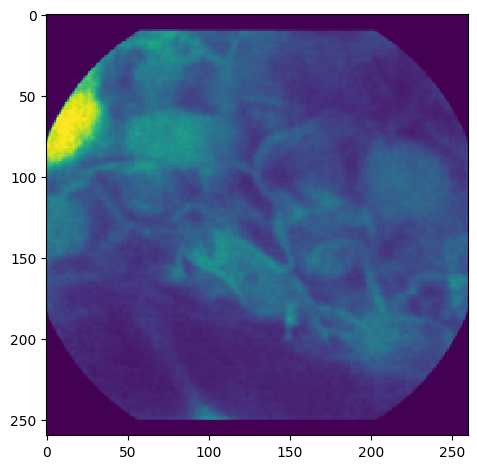

In [32]:
io.imshow(ejem)
plt.show()

In [33]:
# We check the dimensions of a single image; in this case, it's the first one
ejem.shape



(260, 260, 4)


 «How to Convert a Picture to Numbers». Accedido 12 de mayo de 2020. https://e2eml.school/images_to_numbers.html.

- Dimension 0: 519 rows of pixels from top to bottom
- Dimension 1: 521 columns of pixels from left to right
- Dimension 2: 3 color channels (red, green, and blue in that order) (RGB)


In [34]:
# Exploring the colors of a random pixel in the first image.
ejem[240][51]



array([ 71,  39, 119, 255], dtype=uint8)

Try the previous line with different pixels

When the values of the three RGB color channels are identical, a shade of gray is produced, ranging from 0 (equivalent to black) to 255 (equivalent to white).


### 2.3 We load all images of healthy tissue and cancerous tissue


In [35]:
# We load the images from the training set as a list of matrices
# or array of numbers (np.arrays).

%time img= [io.imread(i, as_gray=True) for i in datos['image_filename'][:]]


CPU times: user 19.7 s, sys: 8.34 s, total: 28 s
Wall time: 8min 33s


In [36]:
len(img)

1469

In [37]:
%%time

img_scl = []
for i in range (len(img)):
    scl = rescale(img[i] , 1/2)
    img_scl.append(scl)

CPU times: user 3.81 s, sys: 254 ms, total: 4.06 s
Wall time: 4.17 s


In [48]:
from skimage import img_as_ubyte, io
import os

# Crear el directorio si no existe
output_dir = '/content/drive/MyDrive/MLBusiness/Unzip/'
os.makedirs(output_dir, exist_ok=True)

# Convertir y guardar cada imagen
for i in range(len(img)):
    filename = os.path.basename(dat.image_filename[i])  # Obtiene solo el nombre del archivo
    img_uint8 = img_as_ubyte(img[i])  # Convertir la imagen al formato uint8
    io.imsave(os.path.join(output_dir, filename), img_uint8)
